# Decision Trees and Random Forests for lung image classification

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Data

In [2]:
a=np.load('pneumoniamnist.npz')
X_train=a['train_images']
X_val=a['val_images']
X_test=a['test_images']
Y_train=a['train_labels']
Y_val=a['val_labels']
Y_test=a['test_labels']

In [3]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

In [4]:
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape[0], 'training samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

4708 training samples
524 validation samples
624 test samples


In [5]:
Y_train=Y_train.reshape(-1)

In [6]:
Y_val=Y_val.reshape(-1)

In [7]:
Y_test=Y_test.reshape(-1)

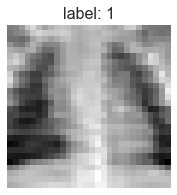

<Figure size 432x288 with 0 Axes>

In [8]:
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, Y_train.shape[0], 100):
    I = X_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(Y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=100, random_state=0)
DT.fit(X_train, Y_train)
Y_test_pred_DT = DT.predict(X_test)

In [10]:
DT.score(X_train, Y_train)

1.0

In [11]:
DT.score(X_test, Y_test)

0.8108974358974359

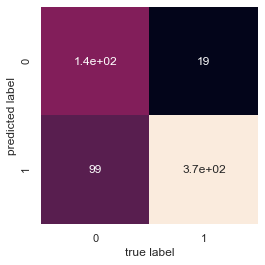

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_test_pred_DT)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Find the best hypyer-parameters of DT

In [13]:
max_depth_list=np.arange(1, 100, 5)
max_depth_list

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [14]:
acc_train_list=[]
acc_val_list=[]
for max_depth in max_depth_list:
    DT = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    DT.fit(X_train, Y_train)
    acc_train=DT.score(X_train, Y_train)
    acc_train_list.append(acc_train)
    acc_val=DT.score(X_val, Y_val)
    acc_val_list.append(acc_val)
    print("max_depth", max_depth, "acc_val", acc_val)

max_depth 1 acc_val 0.8034351145038168
max_depth 6 acc_val 0.916030534351145
max_depth 11 acc_val 0.9198473282442748
max_depth 16 acc_val 0.916030534351145
max_depth 21 acc_val 0.9179389312977099
max_depth 26 acc_val 0.9198473282442748
max_depth 31 acc_val 0.9198473282442748
max_depth 36 acc_val 0.9198473282442748
max_depth 41 acc_val 0.9198473282442748
max_depth 46 acc_val 0.9198473282442748
max_depth 51 acc_val 0.9198473282442748
max_depth 56 acc_val 0.9198473282442748
max_depth 61 acc_val 0.9198473282442748
max_depth 66 acc_val 0.9198473282442748
max_depth 71 acc_val 0.9198473282442748
max_depth 76 acc_val 0.9198473282442748
max_depth 81 acc_val 0.9198473282442748
max_depth 86 acc_val 0.9198473282442748
max_depth 91 acc_val 0.9198473282442748
max_depth 96 acc_val 0.9198473282442748


Text(0, 0.5, 'acc_val')

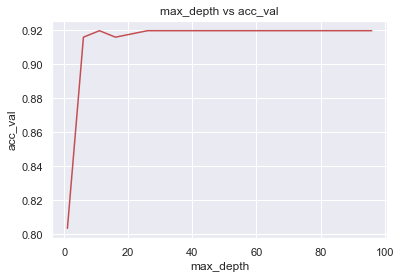

In [15]:
plt.plot(max_depth_list, acc_val_list, '-r')
plt.title('max_depth vs acc_val')
plt.xlabel('max_depth')
plt.ylabel('acc_val')

In [16]:
max_depth_best=26

In [17]:
DT = DecisionTreeClassifier(max_depth=max_depth_best, random_state=0)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=26, random_state=0)

In [18]:
DT.score(X_train, Y_train)

1.0

In [19]:
DT.score(X_test, Y_test)

0.8108974358974359

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=100, random_state=0)
RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=100, max_samples=0.8, random_state=0)

In [21]:
Y_test_pred_RF = RF.predict(X_test)

In [22]:
RF.score(X_train, Y_train)

1.0

In [23]:
RF.score(X_test, Y_test)

0.8573717948717948

And for good measure, plot the confusion matrix:

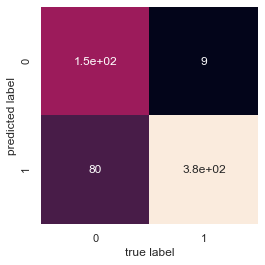

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_test_pred_RF)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Find the best hyper-parameters of RF

In [32]:
max_depth_list=np.arange(1, 200, 10)
max_depth_list

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])

In [33]:
acc_train_list=[]
acc_val_list=[]
for max_depth in max_depth_list:
    RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=max_depth, random_state=0)
    RF.fit(X_train, Y_train)
    acc_train=RF.score(X_train, Y_train)
    acc_train_list.append(acc_train)
    acc_val=RF.score(X_val, Y_val)
    acc_val_list.append(acc_val)
    print("max_depth", max_depth, "acc_val", acc_val)

max_depth 1 acc_val 0.8282442748091603
max_depth 11 acc_val 0.9522900763358778
max_depth 21 acc_val 0.9599236641221374
max_depth 31 acc_val 0.9599236641221374
max_depth 41 acc_val 0.9599236641221374
max_depth 51 acc_val 0.9599236641221374
max_depth 61 acc_val 0.9599236641221374
max_depth 71 acc_val 0.9599236641221374
max_depth 81 acc_val 0.9599236641221374
max_depth 91 acc_val 0.9599236641221374
max_depth 101 acc_val 0.9599236641221374
max_depth 111 acc_val 0.9599236641221374
max_depth 121 acc_val 0.9599236641221374
max_depth 131 acc_val 0.9599236641221374
max_depth 141 acc_val 0.9599236641221374
max_depth 151 acc_val 0.9599236641221374
max_depth 161 acc_val 0.9599236641221374
max_depth 171 acc_val 0.9599236641221374
max_depth 181 acc_val 0.9599236641221374
max_depth 191 acc_val 0.9599236641221374


Text(0, 0.5, 'acc_val')

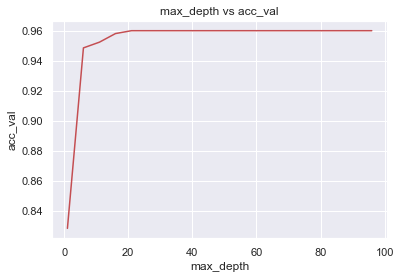

In [27]:
plt.plot(max_depth_list, acc_val_list, '-r')
plt.title('max_depth vs acc_val')
plt.xlabel('max_depth')
plt.ylabel('acc_val')

In [34]:
max_depth_best=21

In [35]:
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=max_depth_best, random_state=0)
RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=21, max_samples=0.8, random_state=0)

In [36]:
RF.score(X_train, Y_train)

1.0

In [37]:
RF.score(X_test, Y_test)

0.8589743589743589